Number of games with Global Sales over 5 million: 144

Percentage of cleaned dataset with Global Sales >5M: 2.05%

Missing values after cleaning:
Name                 0
Platform             0
Year_of_Release    123
Genre                0
Publisher            4
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score         0
Critic_Count         0
User_Score           0
User_Count           0
Developer            4
Rating              70
dtype: int64


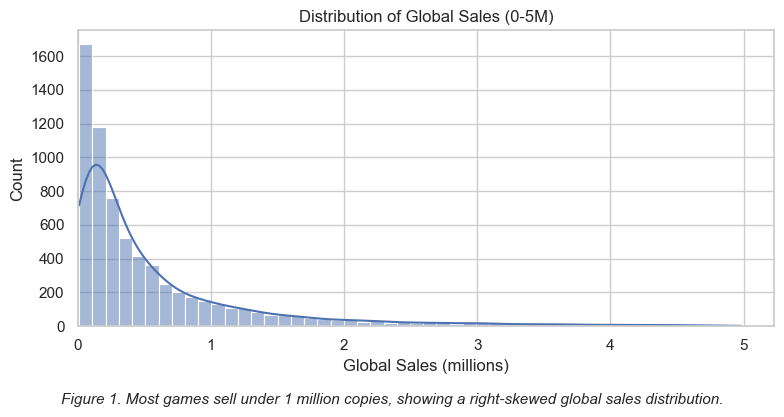

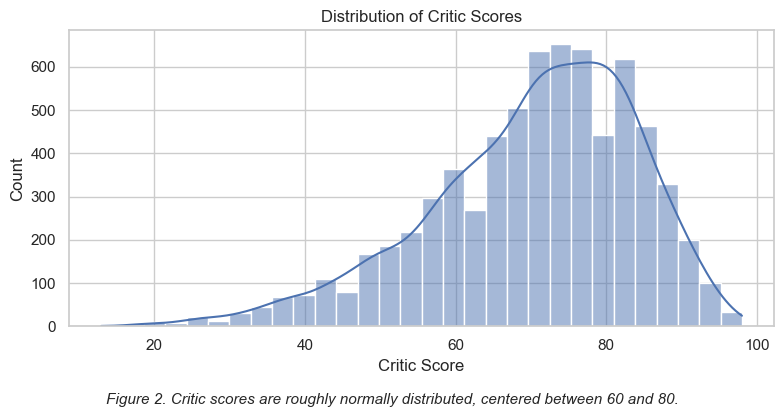

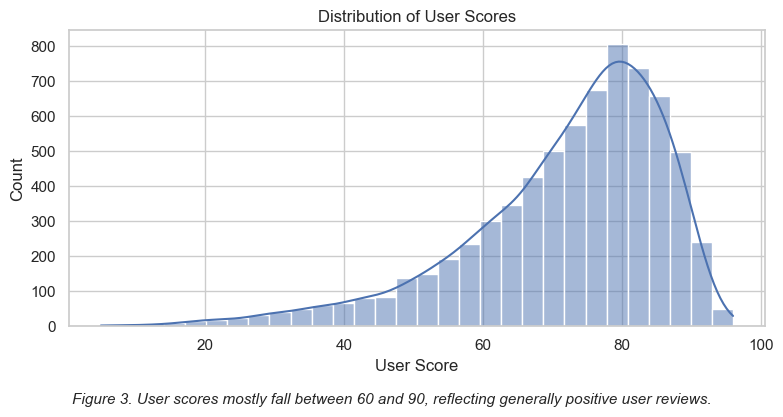

Summary statistics for key numeric variables:
       Global_Sales  Critic_Score   User_Score
count   7017.000000   7017.000000  7017.000000
mean       0.767049     70.249822    71.824284
std        1.940317     13.880646    14.412410
min        0.010000     13.000000     5.000000
25%        0.110000     62.000000    65.000000
50%        0.290000     72.000000    75.000000
75%        0.750000     80.000000    82.000000
max       82.530000     98.000000    96.000000


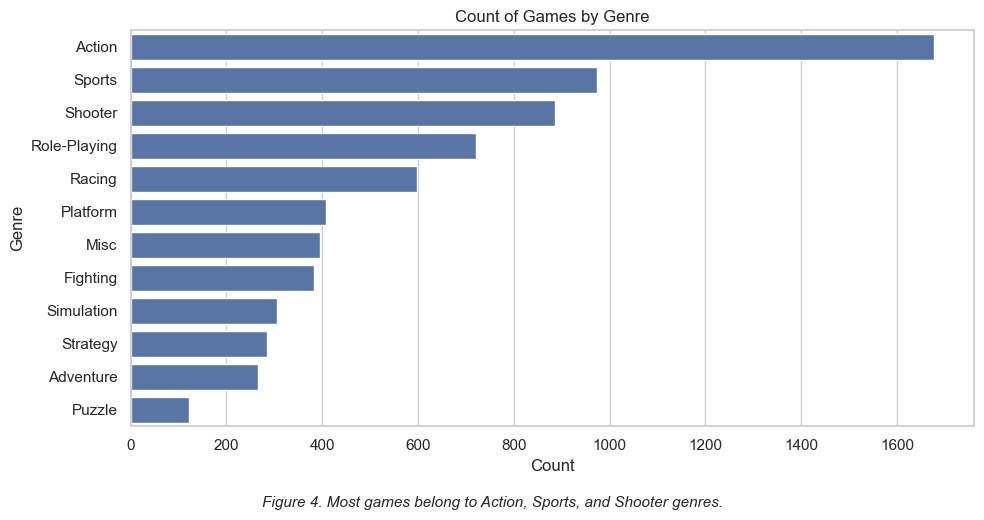

Summary statistics for Global Sales by Genre:
               count      mean       std   min   25%   50%     75%    max
Genre                                                                    
Action        1677.0  0.731431  1.458499  0.01  0.12  0.29  0.7400  21.04
Adventure      265.0  0.308226  0.608930  0.01  0.06  0.13  0.2900   5.54
Fighting       383.0  0.655405  1.069742  0.01  0.13  0.33  0.7650  12.84
Misc           396.0  1.074444  2.457074  0.01  0.17  0.38  0.9975  28.92
Platform       407.0  0.930319  2.409449  0.01  0.12  0.35  0.9200  29.80
Puzzle         121.0  0.655124  1.602442  0.01  0.08  0.14  0.5600  15.29
Racing         598.0  0.806756  2.220888  0.01  0.10  0.27  0.7600  35.52
Role-Playing   721.0  0.699251  1.227156  0.01  0.10  0.26  0.7000   9.72
Shooter        886.0  0.930305  1.835075  0.01  0.11  0.33  0.8975  14.73
Simulation     306.0  0.670163  1.224445  0.01  0.08  0.30  0.7075  12.13
Sports         973.0  0.876084  3.128041  0.01  0.17  0.38  0.8500

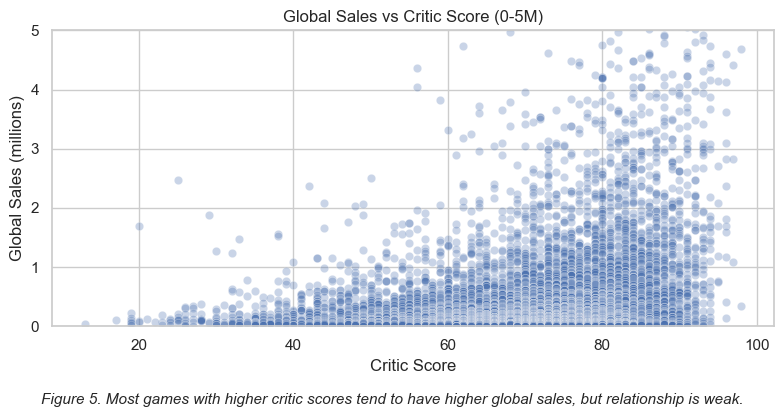

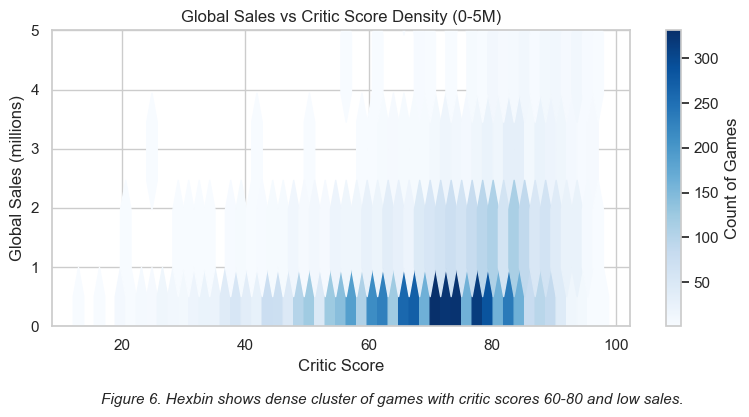

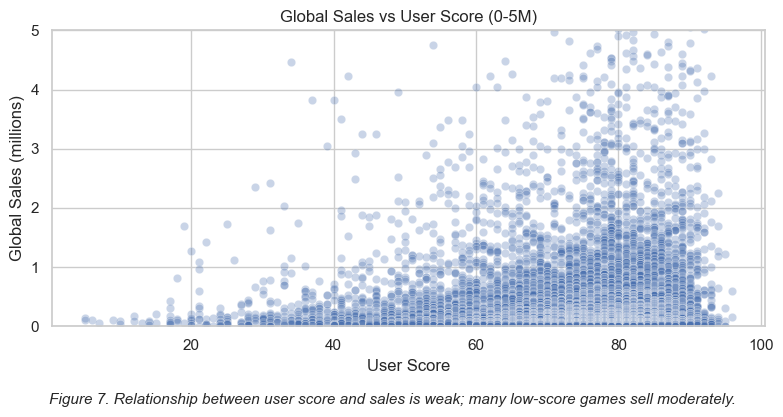

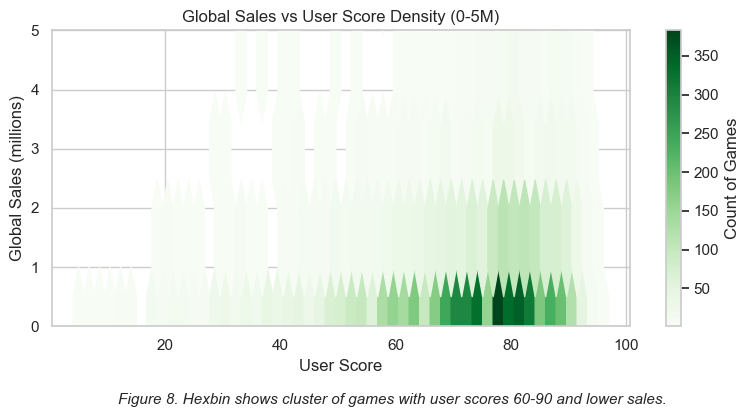

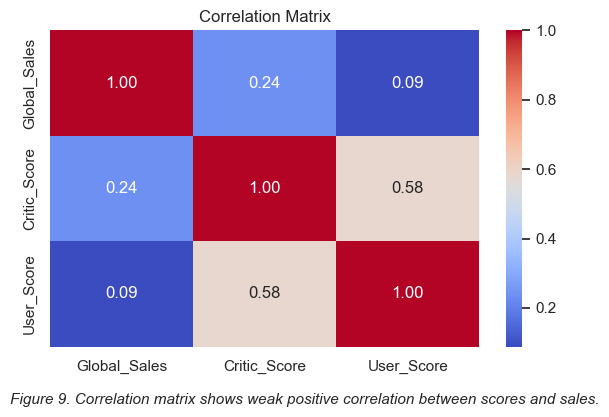

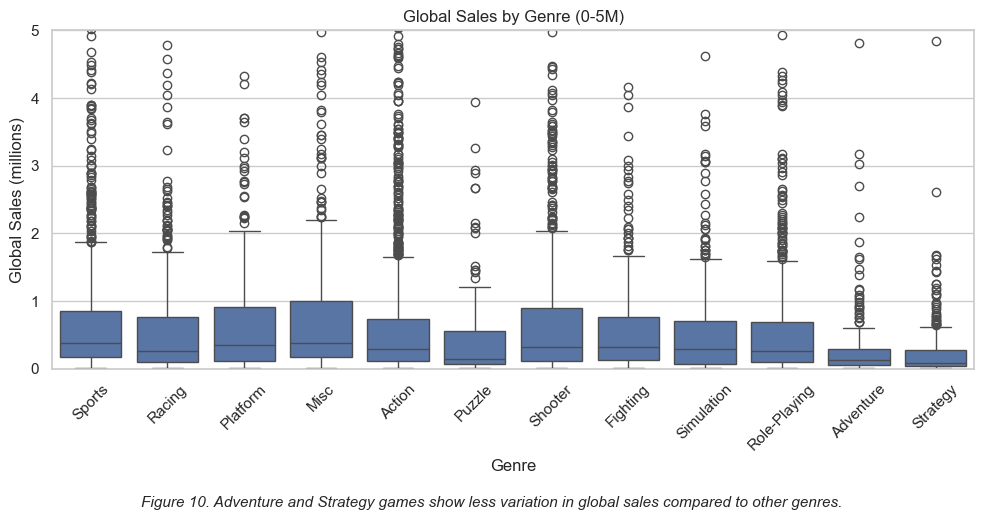

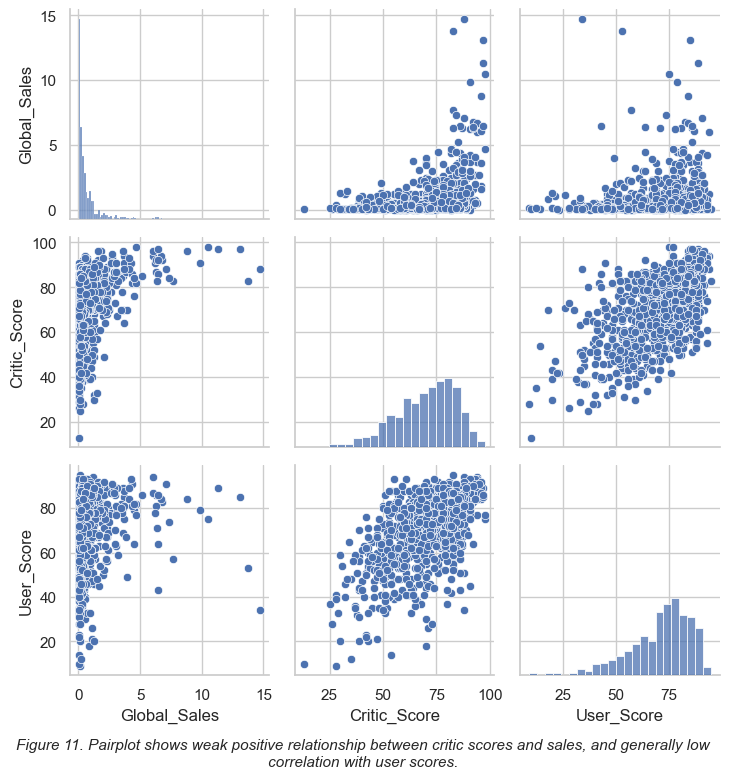

Games with low critic scores but relatively high sales (>2M):
                 Name Platform       Genre  Critic_Score  User_Score  \
67         Just Dance      Wii        Misc          49.0        80.0   
423        Game Party      Wii        Misc          25.0        43.0   
452     Zumba Fitness     X360      Sports          42.0        55.0   
537     Tetris Worlds      PS2      Puzzle          44.0        62.0   
544  The Sims 2: Pets       DS  Simulation          49.0        52.0   
560    Carnival Games       DS        Misc          48.0        33.0   

     Global_Sales  
67           7.20  
423          2.48  
452          2.37  
537          2.08  
544          2.07  
560          2.03  

Top 20 games with Global Sales >5M:
                                            Name Platform     Genre  \
0                                     Wii Sports      Wii    Sports   
1                                 Mario Kart Wii      Wii    Racing   
2                              Wii Sports R

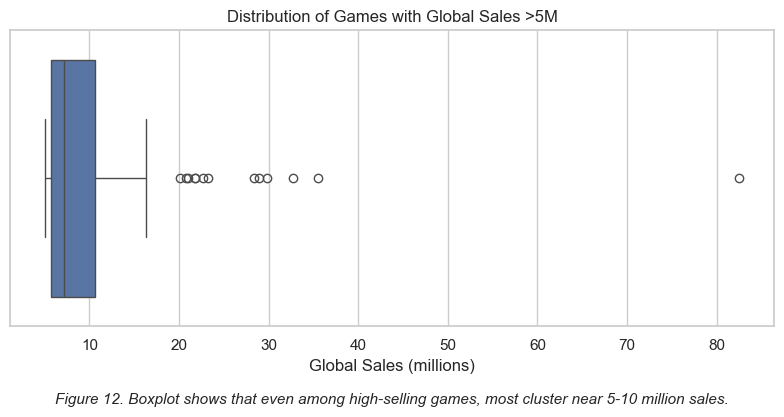

Random Forest predictive evaluation on test set:
R² score: 0.051
Mean Squared Error: 2.307


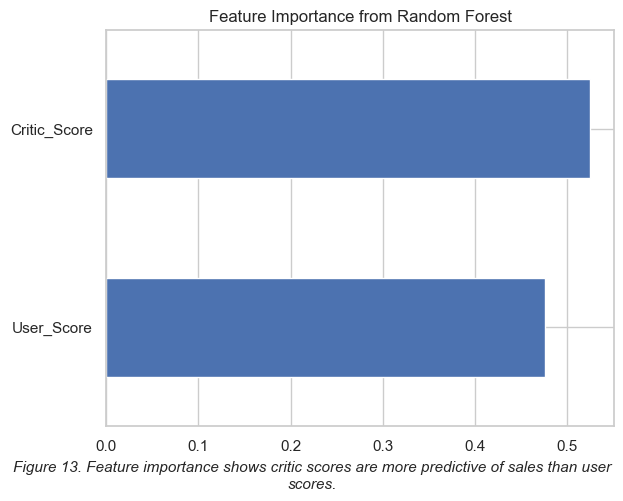

Feature importance values:
Critic_Score    0.524282
User_Score      0.475718
dtype: float64


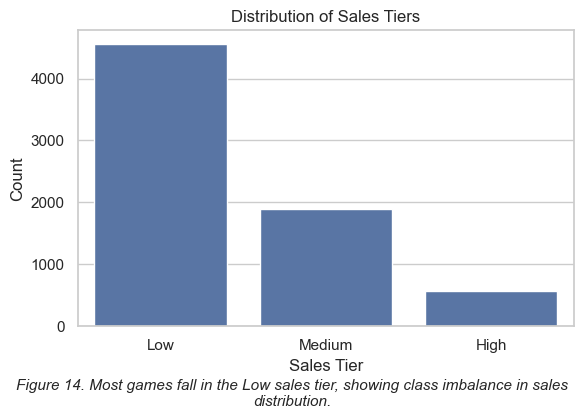

Sales tier counts:
Sales_Tier
Low       4556
Medium    1890
High       571
Name: count, dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Importing cleaned dataset
cleaned_df = pd.read_csv("https://raw.githubusercontent.com/seamusgsullivan/Video-Game-Ratings-Sales-and-Genre-Analysis/main/data/processed/Cleaned_Video_Games_Sales_as_at_22_Dec_2016.csv")

# Remember, each entry/row in the dataset represents a single video game title released on a specific platform, as explained in the Sprint 2 report in the Unit of Analysis section.
# For example, "FIFA 14" on Xbox 360 and "FIFA 14" on PlayStation 3 are recorded as separate entries in the dataset. 
# So when I say "games", I really mean "individual game/platform entries". I just say "games" for convenience!

# Check extremely high-selling games (>5M) for reference
high_sales_5M = cleaned_df[cleaned_df['Global_Sales'] > 5]
count_high_sales_5M = len(high_sales_5M)
print(f"Number of games with Global Sales over 5 million: {count_high_sales_5M}\n")

pct_high_sales_5M = round(count_high_sales_5M / len(cleaned_df) * 100, 2)
print(f"Percentage of cleaned dataset with Global Sales >5M: {pct_high_sales_5M}%\n")

# Verify no missing values remain for key variables
missing_summary = cleaned_df.isnull().sum()
print("Missing values after cleaning:")
print(missing_summary)

sns.set(style="whitegrid")

# --------------------------------------
# Univariate Analysis
# --------------------------------------

key_numeric_vars = ['Global_Sales', 'Critic_Score', 'User_Score']

for var in key_numeric_vars:
    plt.figure(figsize=(8,4))

    if var == 'Global_Sales':
        sns.histplot(cleaned_df[cleaned_df['Global_Sales'] <= 5]['Global_Sales'], bins=50, kde=True)
        plt.xlim(left=0)
        plt.title('Distribution of Global Sales (0-5M)')
        plt.xlabel('Global Sales (millions)')
        plt.ylabel('Count')
        plt.figtext(0.5, -0.03, "Figure 1. Most games sell under 1 million copies, showing a right-skewed global sales distribution.", ha='center', wrap=True, fontsize=11, style='italic')
    elif var == 'Critic_Score':
        sns.histplot(cleaned_df[var], bins=30, kde=True)
        plt.title('Distribution of Critic Scores')
        plt.xlabel('Critic Score')
        plt.ylabel('Count')
        plt.figtext(0.5, -0.03, "Figure 2. Critic scores are roughly normally distributed, centered between 60 and 80.", ha='center', wrap=True, fontsize=11, style='italic')
    else:
        sns.histplot(cleaned_df[var], bins=30, kde=True)
        plt.title('Distribution of User Scores')
        plt.xlabel('User Score')
        plt.ylabel('Count')
        plt.figtext(0.5, -0.03, "Figure 3. User scores mostly fall between 60 and 90, reflecting generally positive user reviews.", ha='center', wrap=True, fontsize=11, style='italic')
    plt.tight_layout()
    plt.show()

# Basic summary statistics
summary_stats = cleaned_df[key_numeric_vars].describe()
print("Summary statistics for key numeric variables:")
print(summary_stats)

# Bar plot for Genre
plt.figure(figsize=(10,5))
sns.countplot(y='Genre', data=cleaned_df, order=cleaned_df['Genre'].value_counts().index)
plt.title('Count of Games by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.figtext(0.5, -0.03, "Figure 4. Most games belong to Action, Sports, and Shooter genres.", ha='center', wrap=True, fontsize=11, style='italic')
plt.tight_layout()
plt.show()

# Summary statistics for Global Sales by Genre
genre_sales_stats = cleaned_df.groupby('Genre')['Global_Sales'].describe()
print("Summary statistics for Global Sales by Genre:")
print(genre_sales_stats)

# --------------------------------------
# Bivariate / Multivariate Analysis
# --------------------------------------

# Scatterplot: Critic Score vs Global Sales (0-5M)
plt.figure(figsize=(8,4))
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=cleaned_df, alpha=0.3)
plt.title('Global Sales vs Critic Score (0-5M)')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (millions)')
plt.ylim(0, 5)
plt.figtext(0.5, -0.03, "Figure 5. Most games with higher critic scores tend to have higher global sales, but relationship is weak.", ha='center', wrap=True, fontsize=11, style='italic')
plt.tight_layout()
plt.show()

# Hexbin overlay for Critic Score density
plt.figure(figsize=(8,4))
plt.hexbin(cleaned_df['Critic_Score'], cleaned_df['Global_Sales'], gridsize=50, cmap='Blues', mincnt=1)
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (millions)')
plt.title('Global Sales vs Critic Score Density (0-5M)')
plt.colorbar(label='Count of Games')
plt.ylim(0, 5)
plt.figtext(0.5, -0.03, "Figure 6. Hexbin shows dense cluster of games with critic scores 60-80 and low sales.", ha='center', wrap=True, fontsize=11, style='italic')
plt.tight_layout()
plt.show()

# Scatterplot: User Score vs Global Sales (0-5M)
plt.figure(figsize=(8,4))
sns.scatterplot(x='User_Score', y='Global_Sales', data=cleaned_df, alpha=0.3)
plt.title('Global Sales vs User Score (0-5M)')
plt.xlabel('User Score')
plt.ylabel('Global Sales (millions)')
plt.ylim(0, 5)
plt.figtext(0.5, -0.03, "Figure 7. Relationship between user score and sales is weak; many low-score games sell moderately.", ha='center', wrap=True, fontsize=11, style='italic')
plt.tight_layout()
plt.show()

# Hexbin overlay for User Score density
plt.figure(figsize=(8,4))
plt.hexbin(cleaned_df['User_Score'], cleaned_df['Global_Sales'], gridsize=50, cmap='Greens', mincnt=1)
plt.xlabel('User Score')
plt.ylabel('Global Sales (millions)')
plt.title('Global Sales vs User Score Density (0-5M)')
plt.colorbar(label='Count of Games')
plt.ylim(0, 5)
plt.figtext(0.5, -0.03, "Figure 8. Hexbin shows cluster of games with user scores 60-90 and lower sales.", ha='center', wrap=True, fontsize=11, style='italic')
plt.tight_layout()
plt.show()

# Correlation matrix
corr_matrix = cleaned_df[['Global_Sales','Critic_Score','User_Score']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.figtext(0.5, -0.03, "Figure 9. Correlation matrix shows weak positive correlation between scores and sales.", ha='center', wrap=True, fontsize=11, style='italic')
plt.tight_layout()
plt.show()

# Boxplots: Sales by Genre (0-5M)
plt.figure(figsize=(10,5))
sns.boxplot(x='Genre', y='Global_Sales', data=cleaned_df)
plt.xticks(rotation=45)
plt.title('Global Sales by Genre (0-5M)')
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.ylim(0, 5)
plt.figtext(0.5, -0.03, "Figure 10. Adventure and Strategy games show less variation in global sales compared to other genres.", ha='center', wrap=True, fontsize=11, style='italic')
plt.tight_layout()
plt.show()

# Pairplot (sample for speed)
sample_df = cleaned_df.sample(1000, random_state=42)
sns.pairplot(sample_df[['Global_Sales','Critic_Score','User_Score']])
plt.figtext(0.5, -0.03, "Figure 11. Pairplot shows weak positive relationship between critic scores and sales, and generally low correlation with user scores.", ha='center', wrap=True, fontsize=11, style='italic')
plt.tight_layout()
plt.show()

# --------------------------------------
# Surprising Findings & Limitations
# --------------------------------------

# Low critic score but relatively high sales (>2M)
low_score_high_sales = cleaned_df[(cleaned_df['Critic_Score'] < 50) & (cleaned_df['Global_Sales'] > 2)]
print("Games with low critic scores but relatively high sales (>2M):")
print(low_score_high_sales[['Name','Platform','Genre','Critic_Score','User_Score','Global_Sales']])

# Top 20 highest-selling games (>5M)
top_sales_5M = high_sales_5M.sort_values('Global_Sales', ascending=False).head(20)
print("\nTop 20 games with Global Sales >5M:")
print(top_sales_5M[['Name','Platform','Genre','Global_Sales']])

# Distribution of games with >5M sales
plt.figure(figsize=(8,4))
sns.boxplot(x='Global_Sales', data=high_sales_5M)
plt.title('Distribution of Games with Global Sales >5M')
plt.xlabel('Global Sales (millions)')
plt.figtext(0.5, -0.03, "Figure 12. Boxplot shows that even among high-selling games, most cluster near 5-10 million sales.", ha='center', wrap=True, fontsize=11, style='italic')
plt.tight_layout()
plt.show()

# --------------------------------------
# Track-Specific Focus: Feature Importance & Class Imbalance
# --------------------------------------

features = ['Critic_Score', 'User_Score']
X = cleaned_df[features]
y = cleaned_df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictive signal: evaluate model
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest predictive evaluation on test set:")
print(f"R² score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

# Feature importance
importances = pd.Series(rf.feature_importances_, index=features)
importances.sort_values().plot(kind='barh')
plt.title('Feature Importance from Random Forest')
plt.figtext(0.5, -0.03, "Figure 13. Feature importance shows critic scores are more predictive of sales than user scores.", ha='center', wrap=True, fontsize=11, style='italic')
plt.tight_layout()
plt.show()
print("Feature importance values:")
print(importances)

# Sales tiers & class imbalance
cleaned_df['Sales_Tier'] = pd.cut(cleaned_df['Global_Sales'], bins=[-1,0.5,2,float('inf')], labels=['Low','Medium','High'])
plt.figure(figsize=(6,4))
sns.countplot(x='Sales_Tier', data=cleaned_df, order=['Low','Medium','High'])
plt.title('Distribution of Sales Tiers')
plt.xlabel('Sales Tier')
plt.ylabel('Count')
plt.figtext(0.5, -0.03, "Figure 14. Most games fall in the Low sales tier, showing class imbalance in sales distribution.", ha='center', wrap=True, fontsize=11, style='italic')
plt.tight_layout()
plt.show()

tier_counts = cleaned_df['Sales_Tier'].value_counts()
print("Sales tier counts:")
print(tier_counts)